In [18]:
%matplotlib inline

import copy
import glob
import time
import os
import shutil
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from tqdm.auto import tqdm

import celloracle as co
from celloracle.applications import Pseudotime_calculator
from celloracle.applications import Gradient_calculator
from celloracle.applications import Oracle_development_module

import plotly.express as px

In [19]:
# Read adata object
adata = sc.read_h5ad('intermediate_data/1_delile.h5ad')

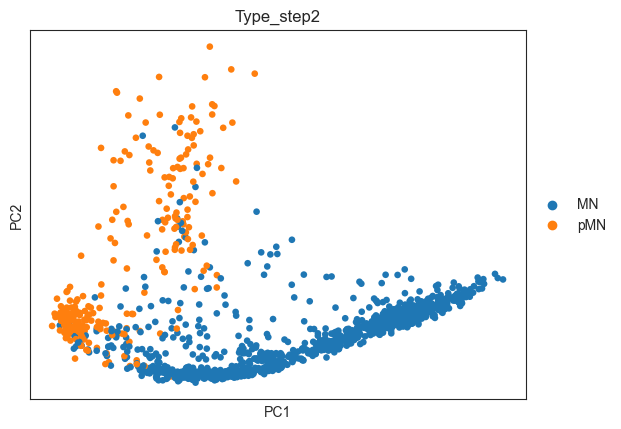

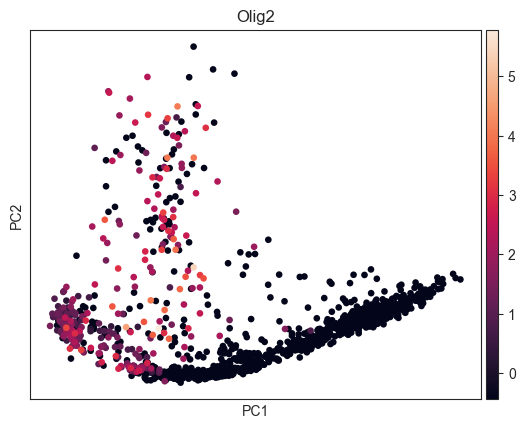

In [20]:
# PCA best captures trajectory of pMN to MN
sc.pl.pca(adata, color='Type_step2')
sc.pl.pca(adata, color='Olig2')

In [21]:
# Calculate pseudotime
pt = Pseudotime_calculator(adata=adata,
                           obsm_key="X_pca",
                           cluster_column_name="Type_step2")

In [22]:
# Set trajectory lineage
lineage_dict = {"pMN": adata.obs.Type_step2.unique().tolist()}
pt.set_lineage(lineage_dict)

In [23]:
# Plot PCA to select starting cell 
embedding = pt.obsm_key
cluster_column_name = pt.cluster_column_name

df = pd.DataFrame(adata.obsm[embedding])
df.columns = df.columns.astype(str) 
df["cluster"] = adata.obs[cluster_column_name].values
df["label"] = adata.obs.index.values
fig = px.scatter(df, x="0", y="1", color="cluster", hover_name="label")
fig.show()

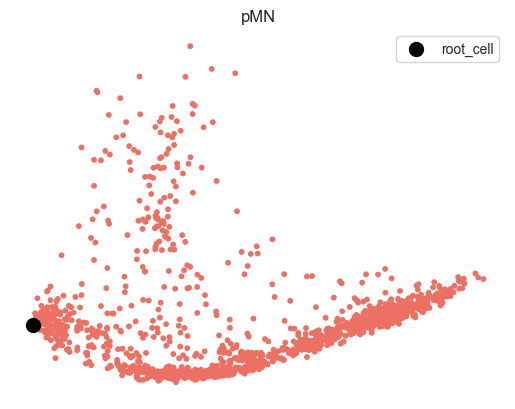

In [24]:
# Set root cell
root_cell = {'pMN':'3418'}
pt.set_root_cells(root_cells = root_cell)
pt.plot_root_cells()

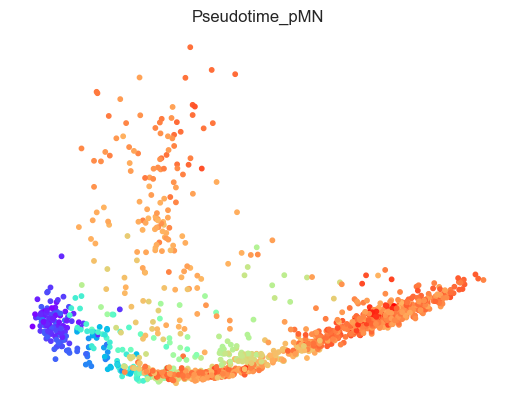

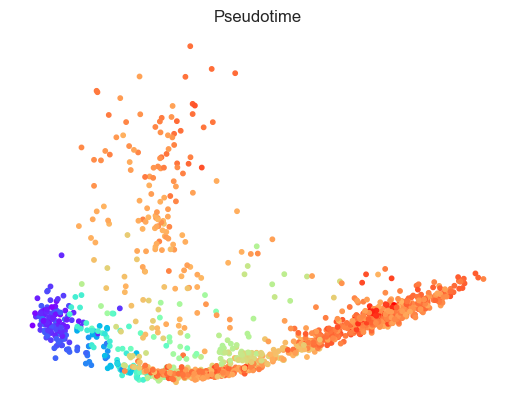

In [25]:
# Calculate pseudotime
pt.get_pseudotime_per_each_lineage()

# Check results
pt.plot_pseudotime(cmap="rainbow")

In [27]:
# Add pseudotime to anndata
adata.obs = pt.adata.obs

# Save anndata
adata.write_h5ad('intermediate_data/2_delile.h5ad')